In [1]:
import numpy as np
import pandas as pd
import datetime
import pandas as pd
from pandas import DataFrame
import dateutil.parser
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
# from preprocess import train_test_split
# from preprocess import n_series
import numpy as np
import pandas as pd
import datetime

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
pwd

u'/home/bharat/proj/time_series1/lstm'

In [9]:
file_path = "/home/bharat/proj/time_series1/4200_C005_2019_03_03.tsv"

In [10]:
df = pd.read_csv(file_path, sep=',', header=None)
df.columns = ["kunag", "matnr", "date", "quantity","price"]

In [11]:
# def train_test_split(input_df,kunag,matnr,i):
#     data= n_series(input_df,kunag,matnr)
#     train = data[0:-i+1]    
#     test = data[-i-1:]
#     train = train.astype('float32')
#     test = test.astype('float32')

In [12]:
# lstm1(df,500056565, 100278,16)

In [13]:
import numpy as np
import pandas as pd
import datetime


def n_series(input_df,kunag,matnr):
    input_df = input_df[input_df["quantity"] >=0]    
    df = input_df.copy()
    n_df1 = df[(df["kunag"] == kunag) & (df["matnr"] == matnr)]
    n_df1.date = n_df1.date.apply(lambda x : pd.to_datetime(x,format = '%Y%m%d', errors='ignore'))
    n_df1 = n_df1.sort_values('date')
    n_df1.set_index('date',inplace=True)
    weekly_resampled_data = n_df1.quantity.resample('W').sum() 
    weekly_resampled_data = weekly_resampled_data.replace(np.nan, 0)
    individual_series = weekly_resampled_data.to_frame()
    dataset = individual_series.values
    # normalize the dataset
    dataset = dataset.astype('float32')

#     scaler = MinMaxScaler(feature_range=(0, 1))
#     dataset = scaler.fit_transform(dataset)
#     individual_series = individual_series.reset_index()
    return dataset


def train_test_split(input_df,kunag,matnr,i):
    data= n_series(input_df,kunag,matnr)
    train = data[0:-i]    
    test = data[-i:-1]
    train = train.astype('float32')
    test = test.astype('float32')

#     scaler = MinMaxScaler(feature_range=(0, 1))
#     train = scaler.fit_transform(train)
#     test = scaler.fit_transform(test)
    return train,test

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [14]:
def n_series1(input_df,kunag,matnr):
    input_df = input_df[input_df["quantity"] >=0]    
    df = input_df.copy()
    n_df1 = df[(df["kunag"] == kunag) & (df["matnr"] == matnr)]
    n_df1.date = n_df1.date.apply(lambda x : pd.to_datetime(x,format = '%Y%m%d', errors='ignore'))
    n_df1 = n_df1.sort_values('date')
    n_df1.set_index('date',inplace=True)
    weekly_resampled_data = n_df1.quantity.resample('W').sum() 
    weekly_resampled_data = weekly_resampled_data.replace(np.nan, 0)
    individual_series = weekly_resampled_data.to_frame()
#     dataset = individual_series.values
#     main_series = individual_series.reset_index()
    return individual_series

def n_series2(input_df,kunag,matnr):
    input_df = input_df[input_df["quantity"] >=0]    
    df = input_df.copy()
    n_df1 = df[(df["kunag"] == kunag) & (df["matnr"] == matnr)]
    n_df1.date = n_df1.date.apply(lambda x : pd.to_datetime(x,format = '%Y%m%d', errors='ignore'))
    n_df1 = n_df1.sort_values('date')
    n_df1.set_index('date',inplace=True)
    weekly_resampled_data = n_df1.quantity.resample('W').sum() 
    weekly_resampled_data = weekly_resampled_data.replace(np.nan, 0)
    individual_series = weekly_resampled_data.to_frame()
#     dataset = individual_series.values
    main_series = individual_series.reset_index()
    return main_series


def train_test_split1(input_df,kunag,matnr,i):
    data= n_series(input_df,kunag,matnr)
    train = data[0:-i+4]    
    test = data[-i-4:]
    return train,test

/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
W0704 15:35:57.163297 140719376230208 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



            quantity
date                
2016-07-24       1.0
2016-07-31       1.0
2016-08-07       0.0
2016-08-14       0.0
2016-08-21       0.0


W0704 15:35:57.328809 140719376230208 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 15:35:57.366463 140719376230208 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 15:35:57.678459 140719376230208 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0704 15:35:57.954355 140719376230208 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has th

Epoch 1/10
 - 2s - loss: 0.0585
Epoch 2/10
 - 0s - loss: 0.0451
Epoch 3/10
 - 0s - loss: 0.0430
Epoch 4/10
 - 0s - loss: 0.0423
Epoch 5/10
 - 0s - loss: 0.0422
Epoch 6/10
 - 0s - loss: 0.0421
Epoch 7/10
 - 0s - loss: 0.0417
Epoch 8/10
 - 0s - loss: 0.0417
Epoch 9/10
 - 0s - loss: 0.0416
Epoch 10/10
 - 0s - loss: 0.0415
Train Score: 0.61 RMSE
Test Score: 0.99 RMSE
('trainPredict :', 119)
('dataset :', 135)
('testPredict :', 16)


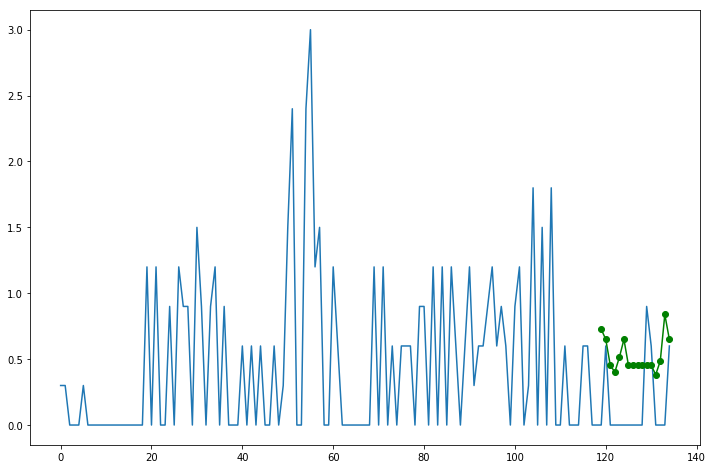

In [15]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = n_series1(df,500056565, 100278)
print(dataframe.head())
# dataframe.set_index('date',inplace=True)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
# train_size = int(len(dataset) * 0.67)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

train,test = train_test_split1(df,500056565, 100278,16)
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
print("trainPredict :",len(trainPredict))
print("dataset :", len(dataset))
print("testPredict :", len(testPredict))
testPredictPlot[len(trainPredict)+(look_back*2)-6:len(dataset), :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(12,8))

plt.plot(scaler.inverse_transform(dataset))
# plt.plot(scaler.inverse_transform(test))
# plt.plot(dataframe.set_index("date")['quantity'])

# plt.plot(trainPredictPlot, marker=".")
plt.plot(testPredictPlot, marker="o",color = "green")
plt.show()

            quantity
date                
2016-07-24       1.0
2016-07-31       1.0
2016-08-07       0.0
2016-08-14       0.0
2016-08-21       0.0
Epoch 1/10
 - 1s - loss: 0.0584
Epoch 2/10
 - 0s - loss: 0.0451
Epoch 3/10
 - 0s - loss: 0.0430
Epoch 4/10
 - 0s - loss: 0.0423
Epoch 5/10
 - 0s - loss: 0.0422
Epoch 6/10
 - 0s - loss: 0.0421
Epoch 7/10
 - 0s - loss: 0.0417
Epoch 8/10
 - 0s - loss: 0.0417
Epoch 9/10
 - 0s - loss: 0.0416
Epoch 10/10
 - 0s - loss: 0.0415
Train Score: 0.61 RMSE
Test Score: 0.99 RMSE
('trainPredict :', 119)
('dataset :', 135)
('testPredict :', 16)


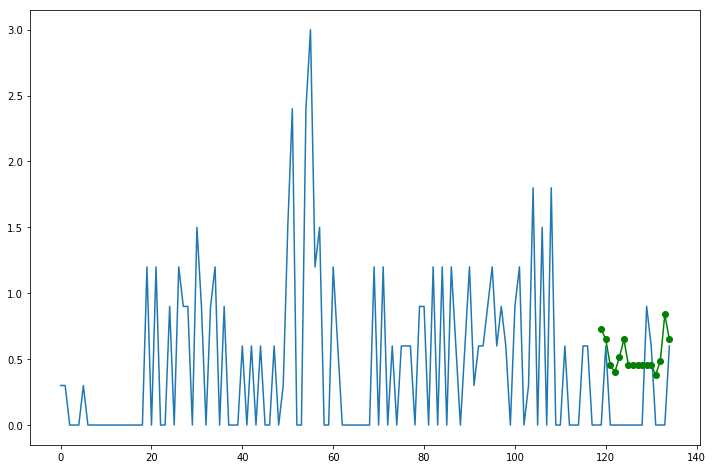

In [16]:

def ses(input_df, kunag,matnr,n):
    i = 0
    lst = []
    test1 = train_test_split(df,kunag,matnr,n)[1]
    y_hat_avg = test1.copy()
    for i in range(n,1,-1):
        numpy.random.seed(7)
    # load the dataset
        dataframe = n_series1(df,500056565, 100278)
        print(dataframe.head())

        dataset = dataframe.values
        dataset = dataset.astype('float32')
        # normalize the dataset
        scaler = MinMaxScaler(feature_range=(0, 1))
        dataset = scaler.fit_transform(dataset)
        # split into train and test sets
        # train_size = int(len(dataset) * 0.67)
        # test_size = len(dataset) - train_size
        # train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

        train,test = train_test_split1(df,500056565, 100278,n)
        train = scaler.fit_transform(train)
        test = scaler.fit_transform(test)

        # reshape into X=t and Y=t+1
        look_back = 3
        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)
        # reshape input to be [samples, time steps, features]
        trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # create and fit the LSTM network
        model = Sequential()
        model.add(LSTM(4, input_shape=(1, look_back)))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
        # make predictions
        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)
        # invert predictions
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        lst.append(pred.iloc[0])

    pd.DataFrame(lst)
    y_hat_avg['pred_column']=lst
    plt.figure(figsize=(12,8))
    plt.plot( train.set_index("date")['quantity'], label='Train')
    plt.plot(test.set_index("date")['quantity'], label='Test')
    plt.plot(y_hat_avg.set_index("date")['pred_column'], label='SES')
    plt.legend(loc='best')
    plt.title("SES")
    plt.show()
    rms = sqrt(mean_squared_error(test1.quantity, y_hat_avg.pred_column))
    print("rms = ", rms)
    del y_hat_avg['SES']
    return y_hat_avg



numpy.random.seed(7)
# load the dataset
dataframe = n_series1(df,500056565, 100278)
print(dataframe.head())

dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
# train_size = int(len(dataset) * 0.67)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

train,test = train_test_split1(df,500056565, 100278,16)
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
print("trainPredict :",len(trainPredict))
print("dataset :", len(dataset))
print("testPredict :", len(testPredict))
testPredictPlot[len(trainPredict)+(look_back*2)-6:len(dataset), :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(12,8))

plt.plot(scaler.inverse_transform(dataset))
# plt.plot(scaler.inverse_transform(test))
# plt.plot(dataframe.set_index("date")['quantity'])

# plt.plot(trainPredictPlot, marker=".")
plt.plot(testPredictPlot, marker="o",color = "green")
plt.show()

In [21]:

def lst(input_df, kunag,matnr,n):
    i = 0
    lst = []
    test1 = train_test_split(df,kunag,matnr,n)[1]
    y_hat_avg = test1.copy()
    for i in range(n,4,-1):
        numpy.random.seed(7)
    # load the dataset
        dataframe = n_series1(df,500056565, 100278)
#         print(dataframe.head())

        dataset = dataframe.values
        dataset = dataset.astype('float32')
        # normalize the dataset
        scaler = MinMaxScaler(feature_range=(0, 1))
        dataset = scaler.fit_transform(dataset)

        train,test = train_test_split1(df,500056565, 100278,i)
        train = scaler.fit_transform(train)
        test = scaler.fit_transform(test)

        # reshape into X=t and Y=t+1
        look_back = 3
        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)
        # reshape input to be [samples, time steps, features]
        trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        print(trainX.shape)
        print(testX.shape)
        # create and fit the LSTM network
        model = Sequential()
        model.add(LSTM(4, input_shape=(1, look_back)))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
        # make predictions
        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)
        # invert predictions
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        print(testPredict.shape)
        testPredict=  testPredict.tolist()
        print(type(testPredict))
        lst.append(testPredict[0])
        print(testPredict[0])
        print("lst :" ,lst)
#     pd.DataFrame(lst)
#     y_hat_avg['pred_column']=lst
#     plt.figure(figsize=(12,8))
#     plt.plot( train.set_index("date")['quantity'], label='Train')
#     plt.plot(test.set_index("date")['quantity'], label='Test')
#     plt.plot(y_hat_avg.set_index("date")['pred_column'], label='SES')
#     plt.legend(loc='best')
#     plt.title("SES")
#     plt.show()
#     rms = sqrt(mean_squared_error(test1.quantity, y_hat_avg.pred_column))
#     print("rms = ", rms)
#     del y_hat_avg['SES']
    return lst


In [22]:
# lst(df,500056565, 100278,16)

In [23]:
out = lst(df,500056565, 100278,16)

(119, 1, 3)
(16, 1, 3)
Epoch 1/10
 - 3s - loss: 0.0584
Epoch 2/10
 - 0s - loss: 0.0451
Epoch 3/10
 - 0s - loss: 0.0430
Epoch 4/10
 - 0s - loss: 0.0423
Epoch 5/10
 - 0s - loss: 0.0422
Epoch 6/10
 - 0s - loss: 0.0421
Epoch 7/10
 - 0s - loss: 0.0417
Epoch 8/10
 - 0s - loss: 0.0417
Epoch 9/10
 - 0s - loss: 0.0416
Epoch 10/10
 - 0s - loss: 0.0415
(16, 1)
<type 'list'>
[0.7269925475120544]
('lst :', [[0.7269925475120544]])
(120, 1, 3)
(15, 1, 3)
Epoch 1/10
 - 2s - loss: 0.0574
Epoch 2/10
 - 0s - loss: 0.0451
Epoch 3/10
 - 0s - loss: 0.0429
Epoch 4/10
 - 0s - loss: 0.0426
Epoch 5/10
 - 0s - loss: 0.0420
Epoch 6/10
 - 0s - loss: 0.0419
Epoch 7/10
 - 0s - loss: 0.0416
Epoch 8/10
 - 0s - loss: 0.0416
Epoch 9/10
 - 0s - loss: 0.0415
Epoch 10/10
 - 0s - loss: 0.0417
(15, 1)
<type 'list'>
[0.6565824151039124]
('lst :', [[0.7269925475120544], [0.6565824151039124]])
(121, 1, 3)
(14, 1, 3)
Epoch 1/10
 - 2s - loss: 0.0569
Epoch 2/10
 - 0s - loss: 0.0449
Epoch 3/10
 - 0s - loss: 0.0425
Epoch 4/10
 - 0s 

In [20]:
len(out)

NameError: name 'out' is not defined

In [62]:
import itertools
merged = list(itertools.chain(*out))

In [63]:
merged

[0.7270129919052124,
 0.6565780639648438,
 0.4383182227611542,
 0.37980788946151733,
 0.48490405082702637,
 0.6320451498031616,
 0.40920087695121765,
 0.4067407548427582,
 0.4210392236709595,
 0.4217166006565094,
 0.4004535675048828,
 0.4013412892818451]

[[0.7270129919052124],
 [0.6565780639648438],
 [0.4383182227611542],
 [0.37980788946151733],
 [0.48490405082702637],
 [0.6320451498031616],
 [0.40920087695121765],
 [0.4067407548427582],
 [0.4210392236709595],
 [0.4217166006565094],
 [0.4004535675048828],
 [0.4013412892818451]]